<a href="https://colab.research.google.com/github/mohamedaichaouiii/Gold-Price-Prediction-using-Machine-Learning-with-Python/blob/main/Gold_Price_Prediction_using_Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi, My name is Mohamed AICHAOUI and this is my project intitled Gold Price Prediction using Machine Learning with Python

Let's start by Importing the Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Data Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#getting the basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of missing value
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting the statstical measure of the data 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:In statistics and machine learning, correlation refers to the statistical relationship between two variables. It measures the degree to which the variables are associated or related to each other.

_Positive Correlation : When two variables have a positive correlation, it means that as one variable increases, the other variable also tends to increase. 

_Negative Correlation : Conversely, when two variables have a negative correlation, it means that as one variable increases, the other variable tends to decrease. 

In [ ]:
correlation = gold_data.corr()

<ipython-input-10-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

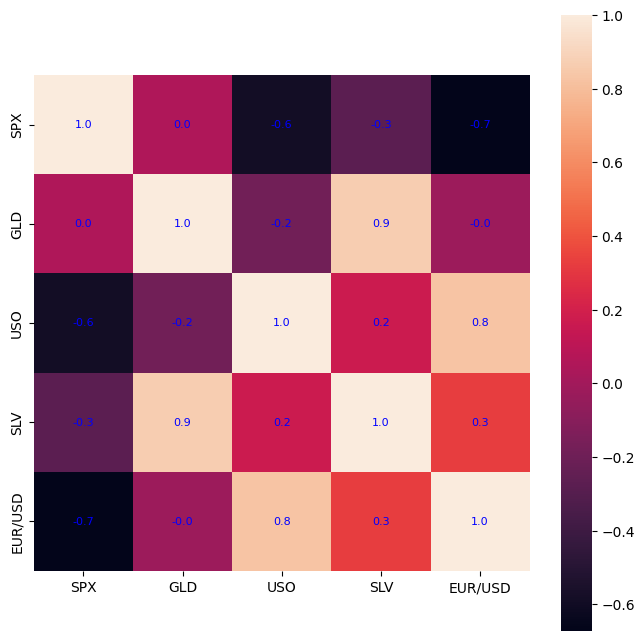

In [ ]:
#construction a heatmap to understand the correlation
plt.figure(figsize =(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8, 'color': 'blue'})


In [ ]:
#coorletion value for GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


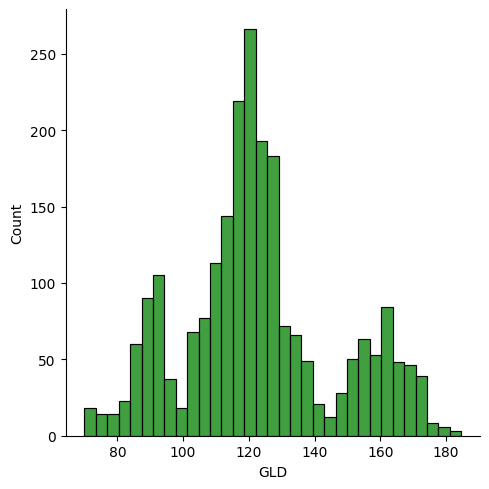

In [ ]:
# checking the distribution of the GLD price 
sns.displot(gold_data['GLD'],color='green') 

Splitting the Features and Target

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y =gold_data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [18]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
#train the model 
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model evaluation


In [21]:
test_data_prediction =regressor.predict(X_test)

In [22]:
print(test_data_prediction)

[168.66149954  82.06149967 115.86840039 127.74780122 120.71890138
 154.79859739 149.90709867 126.21030056 117.66809889 126.03850078
 116.46900133 171.44920119 141.52559865 167.80659879 115.26240048
 117.5536007  139.80040333 170.19590092 159.08760295 159.84499928
 155.05479941 125.20220037 175.4408     156.9842032  125.16270025
  93.87669956  77.28880017 120.49110028 119.20839963 167.4928993
  88.11310044 125.07309987  91.17570084 117.72620048 121.00129863
 136.15110052 115.42390114 115.19990056 145.74749973 107.13510119
 104.82690277  87.09179793 126.41870019 117.78769984 152.05969865
 119.61799989 108.29710002 107.96279807  93.11320018 127.041798
  74.70030038 113.74119945 121.37129996 111.4385995  118.82289894
 120.82309933 159.76579966 168.57620084 147.19429673  86.13309862
  94.17200005  86.90599867  90.65109996 118.98240074 126.43360061
 127.61860046 169.1272001  122.29749914 117.37769873  98.30230025
 168.2049013  143.22159768 132.00040239 121.05380242 121.13529931
 119.60340066

In [24]:
#R squard value 
error_score= metrics.r2_score(Y_test, test_data_prediction)
print(" R Error squard :",error_score)

 R Error squard : 0.9893274702836121


In [25]:
Y_test = list(Y_test)

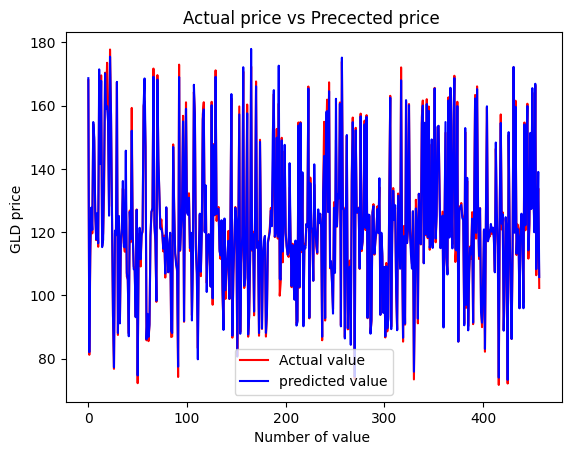

In [28]:
plt.plot(Y_test, color='red', label='Actual value')
plt.plot(test_data_prediction,color='Blue', label='predicted value')
plt.title('Actual price vs Precected price ')
plt.xlabel('Number of value ')
plt.ylabel('GLD price ')
plt.legend()
plt.show()